## **Linear Regression Exercise**


This is a Jupyter Notebook file (`.ipynb` extension) that contains a machine learning exercise focused on Linear Regression. The file appears to be using the "Combined cycle powerplant dataset" from Kaggle.

Key details about the dataset:
1. The data is stored in a CSV file named "Folds5x2_pp.csv"
2. It contains 5 columns:
   - 4 input features (X):
     - T (Temperature)
     - V (Vacuum)
     - AP (Air Pressure) 
     - RH (Relative Humidity)
   - 1 target variable (y):
     - PE (Power Output) to be predicted

The notebook includes:
1. Basic data loading and preprocessing using NumPy
2. Visualization using Matplotlib
3. Implementation of machine learning models including:
   - A neural network using Keras/TensorFlow with multiple dense layers
   - Data preprocessing using scikit-learn's Pipeline and ColumnTransformer
   - Train-test splitting and model evaluation using Mean Absolute Error (MAE)

The goal appears to be predicting the power output of a combined cycle power plant based on environmental variables like temperature, vacuum, pressure and humidity.

The notebook also contains some visualizations showing the model's performance on both training and test sets, with scatter plots comparing actual vs predicted values and reporting MAE metrics.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Exercise 1:** [Combined cycle powerplant-dataset](https://www.kaggle.com/datasets/gova26/airpressure)





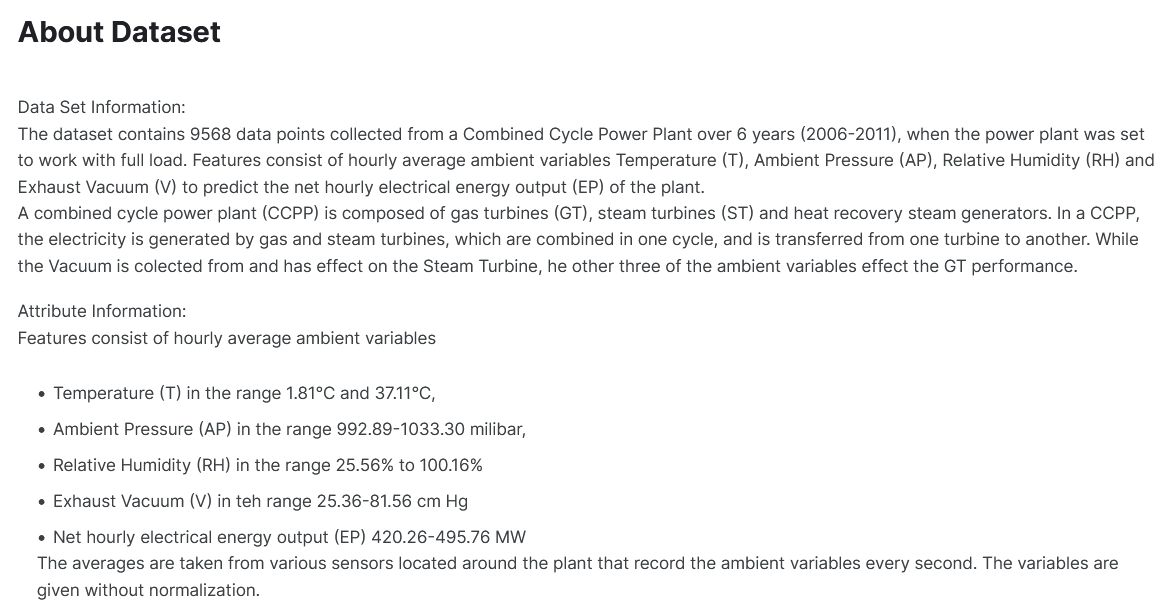

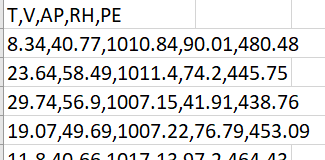

Load Folds5x2_pp.csv to Colab

In [2]:
#read the dataset into a matrix data
data=np.loadtxt('Folds5x2_pp.csv', delimiter=',', skiprows=1)
X=data[:,:4] #coodinates [x1,x2,x3,x4]=[T,V,AP,RH] as rows
y=data[:,4] #values of PE to be predicted

print(X[:5,:])
print(y[:5])

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 [  19.07   49.69 1007.22   76.79]
 [  11.8    40.66 1017.13   97.2 ]]
[480.48 445.75 438.76 453.09 464.43]


Draw pictures like below of the distributions of values of the coordinates and $y=PE$

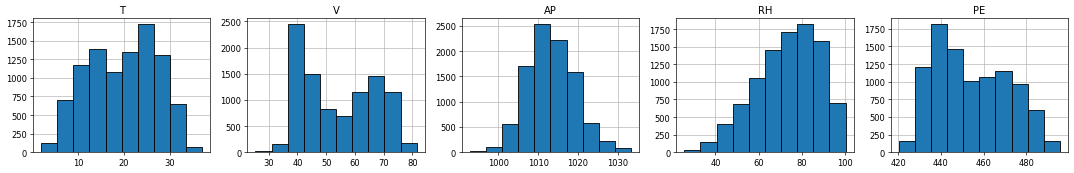

In [92]:
fig, axs = plt.subplots(1,5, figsize=(18, 3), dpi=60)
features = ['T', 'V', 'AP', 'RH', 'PE']

for i, ax in enumerate(axs):
    ax.hist(data[:, i], bins=10, alpha=1, edgecolor='black',zorder=3)
    ax.set_title(f'{features[i]}')
    ax.set_title(f'{features[i]}')
    ax.grid(True,linestyle='-', linewidth=0.75)

plt.tight_layout()
plt.show()

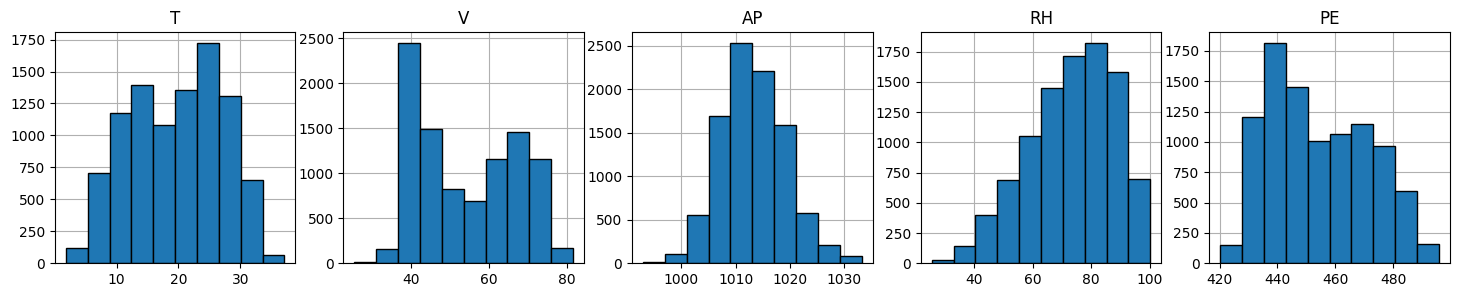

and on the dependance of $y=PE$ on the coordinates $T,V,AP,RH$

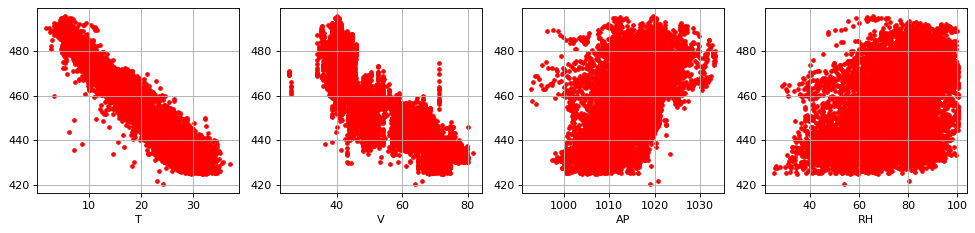

In [167]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3),dpi=80)

for i, ax in enumerate(axs.flatten()):
    ax.scatter(X[:,i], y, color='red',s=10,alpha=1)
    ax.set_xlabel(features[i])
    ax.grid(True,zorder=0)
plt.show()

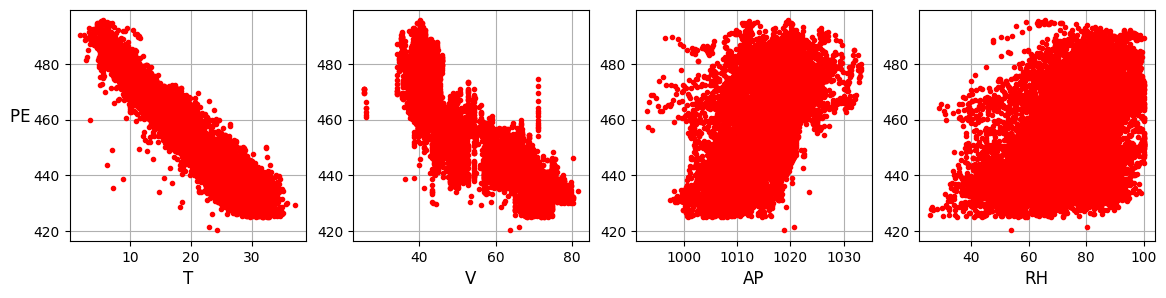

Find coefficients to a  formula  
$$
y=w_1\widehat{x}_1+w_2\widehat{x}_2+w_3\widehat{x}_3+w_4\widehat{x}_4+b
$$

using the scaled coordinates

$$
\widehat{x}_j=\frac{x_j-\mu_j}{\sigma_j},\quad j=1,2,3,4
$$



(ans: $w=[-14.737, -2.972,   0.369,  -2.308],\,b=
454.365$)


 and draw a picture like below

In [171]:
# Scale features
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_scaled = np.column_stack((X_scaled, np.ones(X.shape[0])))
w = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y

# Print coefficients
print(f"(ans: 𝑤={w[:-1]}, 𝑏={w[-1]})")

(ans: 𝑤=[-14.73659333  -2.97242952   0.36867791  -2.30751179], 𝑏=454.36500940635375)


Now for the plot part

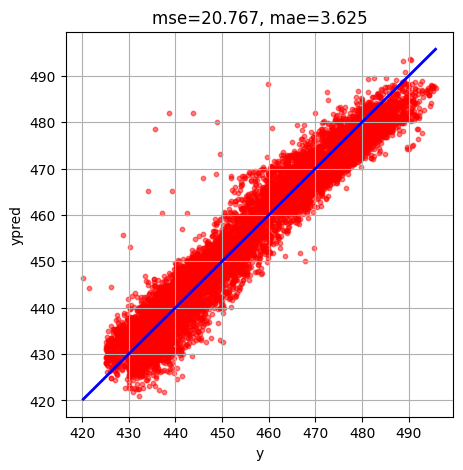


ans: 479.60


In [194]:
y_pred = X_scaled @ w
plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, alpha=0.5, s=10, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-', lw=2)
plt.xlabel('y')
plt.ylabel('ypred')
plt.title('mse=20.767, mae=3.625')
plt.grid(True)
plt.show()

x_new = np.array([8, 40, 1050, 95])
x_new_scaled = (x_new - np.mean(X, axis=0)) / np.std(X, axis=0)
x_new_scaled = np.append(x_new_scaled, 1)  # Add bias term
y_pred_new = x_new_scaled @ w

print(f"\nans: {y_pred_new:.2f}")

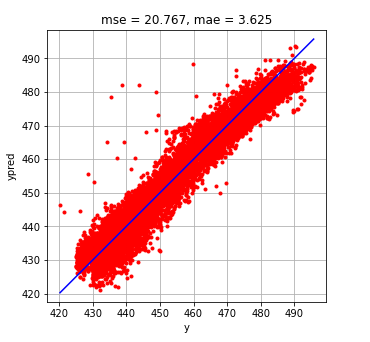

Calculate the predicted value for $y$, when
$x=[8,40,1050,95]$

(ans: 479.60)

## **Exercise 2:**



Use the points $x^{(i)},y^{(i)}$ given below to find a formula

$$
y=w_1x^2+w_2x+b
$$

using linear regression for datapoints

$$
[x_1^{(i)},x_2^{(i)}],\,y^{(i)}
$$

where

$$x_1^{(i)}=(x^{(i)})^2,\,x_2^{(i)}=x^{(i)}$$

and draw pictures like below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [233]:
# Gradient Descent Function
def compute_cost(X, y, w, b):
    m = len(y)
    cost = np.sum((X @ w + b - y) ** 2) / (2 * m)
    return cost

def gradient_descent(X, y, w, b, alpha, num_iters):
    m = len(y)
    J_history = []
    params_history = []

    for i in range(num_iters):
        y_pred = X @ w + b
        error = y_pred - y

        w -= alpha * (X.T @ error) / m
        b -= alpha * np.sum(error) / m
        J_history.append(compute_cost(X, y, w, b))
        params_history.append((w[0], w[1], b))


    return w, b, J_history, params_history

In [234]:
# Generating synthetic data
np.random.seed(0)
m = 30
A, B, C = 1, 2, -4
x0 = -B / (2 * A)
L = 3

x = np.random.uniform(x0 - L, x0 + L, m)
error = np.random.normal(0, 0.4, m)
y = A * x**2 + B * x + C + error

X = np.vstack((x**2, x)).T
w = np.zeros(2)
b = 0
alpha = 0.01
num_iters = 5000



so the output is as:
w: [0.99078955 1.9665991 ]
b: -4.028261815069161


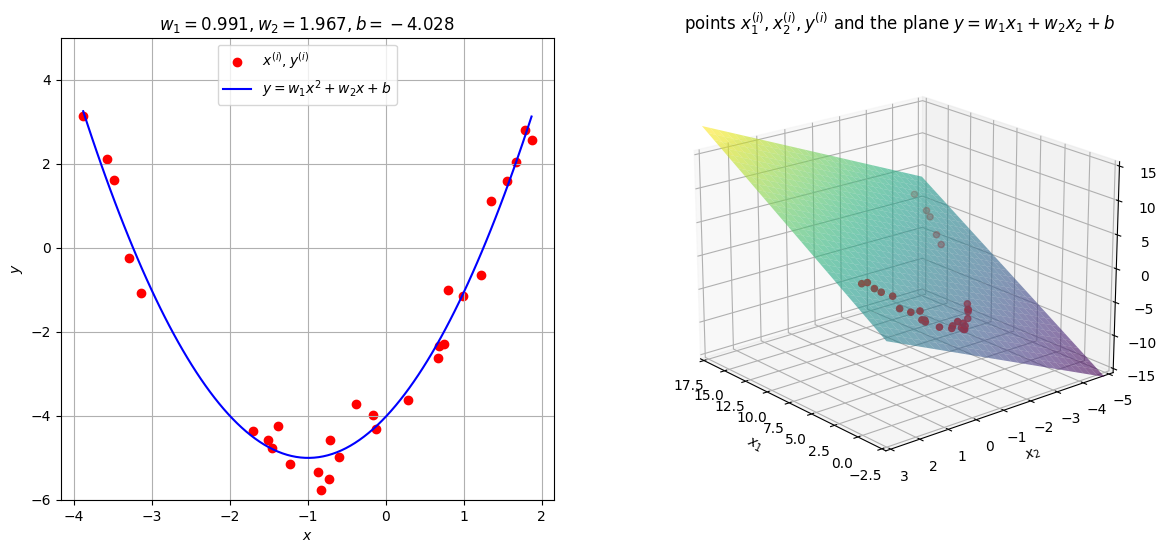

In [264]:
# i will now perform gradient descent
w, b, J_history, params_history = gradient_descent(X, y, w, b, alpha, num_iters)
print(f'so the output is as:')
print(f'w: {w}')
print(f'b: {b}')

w1_hist, w2_hist, b_hist = zip(*params_history)
plt.figure(figsize=(14, 6))

# 2D plot
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='red', label='$x^{(i)}, y^{(i)}$')
x_fit = np.linspace(min(x), max(x), 100)              #as this x formula is given in the question for us
y_fit = w[0] * x_fit**2 + w[1] * x_fit + b           #as this y formula is given in the question for us
plt.plot(x_fit, y_fit, color='blue', label='$y = w_1 x^2 + w_2 x + b$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$w_1 = {w[0]:.3f}, w_2 = {w[1]:.3f}, b = {b:.3f}$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
plt.grid(True)
plt.ylim(-6, 5)


# 3D plot
ax = plt.subplot(1, 2, 2, projection='3d')

x1_range = np.linspace(-2.5, 17.5, 30)
x2_range = np.linspace(-5, 3, 30)
x1_fit, x2_fit = np.meshgrid(x1_range, x2_range)

#again the formula for y as given in question
y_fit = w[0] * x1_fit + w[1] * x2_fit + b
ax.plot_surface(x1_fit, x2_fit, y_fit, cmap='viridis', alpha=0.6)
ax.grid(True)
ax.scatter(X[:, 0], X[:, 1], y, color='red')

ax.set_xlim(-2.5, 17.5)
ax.set_ylim(-5, 3)
ax.set_zlim(-15, 15)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('points $x_1^{(i)}, x_2^{(i)}, y^{(i)}$ and the plane $y = w_1 x_1 + w_2 x_2 + b$')


ax.view_init(elev=20., azim=140)

plt.show()


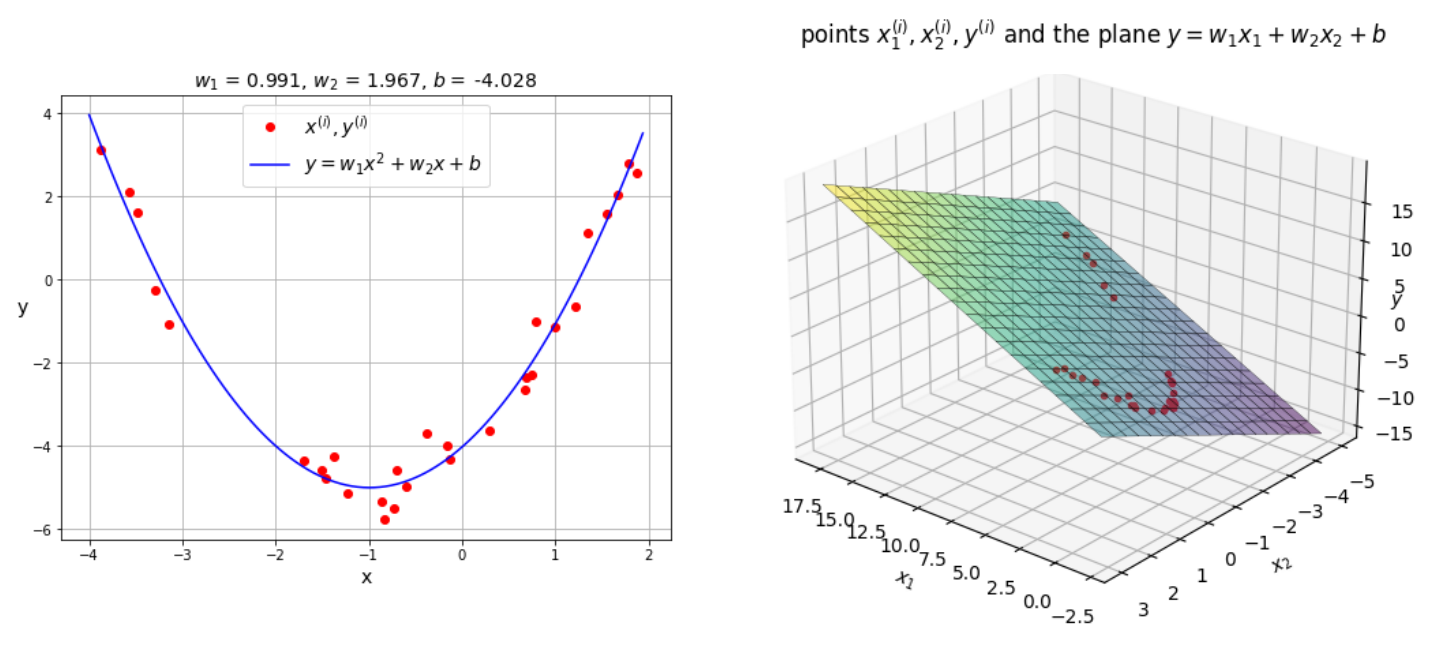

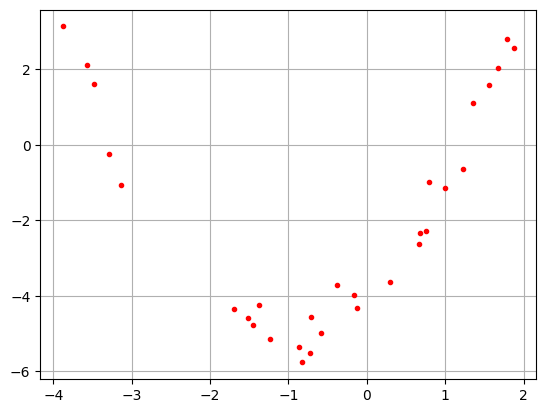

In [208]:
#points x^(i),y^(i)
m=30
A=1
B=2
C=-4
x0=-B/(2*A)
L=3
np.random.seed(0)

x=np.random.uniform(x0-L,x0+L,m)
error=np.random.normal(0,0.4,m)
y=A*x**2+B*x+C+error

plt.plot(x,y,'r.')
plt.grid()
plt.show()

## **Exercise 3:**



Find the coefficients (kertoimet in Finnish) $w_1,w_2,b$ in exercise 2
by minimizing the cost

$$
C=\frac{1}{m}\,\sum_{i=1}^m \left(w_1x^{(i)}_1+w_2x^{(i)}_2+b-y^{(i)}\right)^2
$$


using the gradient descent and draw pictures like below (päivityskierros = update in Finnish)


In [271]:
# Gradient Descent Function
def compute_cost(X, y, w, b):
    m = len(y)
    cost = np.sum((X @ w + b - y) ** 2) / (2 * m)
    return cost

def gradient_descent(X, y, w, b, alpha, num_iters):
    m = len(y)
    J_history = []
    params_history = []

    for i in range(num_iters):
        y_pred = X @ w + b
        error = y_pred - y

        w -= alpha * (X.T @ error) / m
        b -= alpha * np.sum(error) / m

        J_history.append(compute_cost(X, y, w, b))
        params_history.append((w[0], w[1], b))

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}")

    return w, b, J_history, params_history

In [279]:
np.random.seed(0)
m = 30
A, B, C = 1, 2, -4
x0 = -B / (2 * A)
L = 3

x = np.random.uniform(x0 - L, x0 + L, m)
error = np.random.normal(0, 0.4, m)
y = A * x**2 + B * x + C + error

X = np.vstack((x**2, x)).T

w = np.ones(2)
b = 1
alpha = 0.01
num_iters = 500

In [285]:
np.random.seed(0)
m = 30
A, B, C = 1, 2, -4
x0 = -B / (2 * A)
L = 3

x = np.random.uniform(x0 - L, x0 + L, m)
error = np.random.normal(0, 0.4, m)
y = A * x**2 + B * x + C + error

# Preparing data for quadratic regression
X = np.vstack((x**2, x)).T

w = np.ones(2)
b = 1
alpha = 0.01
num_iters = 500

Iteration 0: Cost 12.080563499961762
Weights: [0.93350676 1.87212113]
Bias: -3.7393996057351506


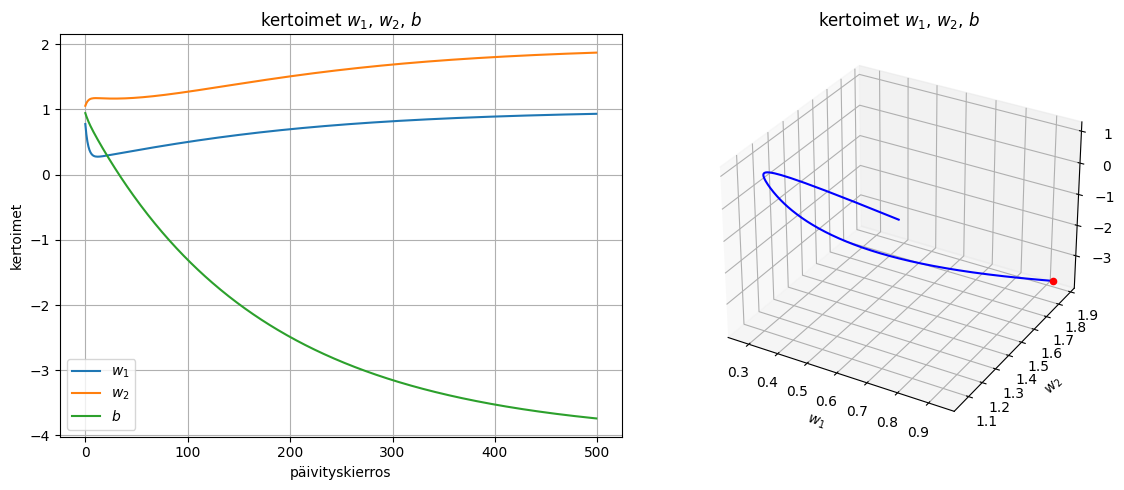

In [286]:

# Perform gradient descent
w, b, J_history, params_history = gradient_descent(X, y, w, b, alpha, num_iters)
print(f'Weights: {w}')
print(f'Bias: {b}')

w1_hist, w2_hist, b_hist = zip(*params_history)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w1_hist, label='$w_1$')
plt.plot(w2_hist, label='$w_2$')
plt.plot(b_hist, label='$b$')
plt.xlabel('päivityskierros')
plt.ylabel('kertoimet')
plt.title('kertoimet $w_1$, $w_2$, $b$')
plt.legend()
plt.grid(True)

ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot(w1_hist, w2_hist, b_hist, color='blue')
ax.scatter(w[0], w[1], b, color='red')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('$b$')
ax.set_title('kertoimet $w_1$, $w_2$, $b$')

ax.view_init(elev=30, azim=-60)

plt.tight_layout()
plt.show()



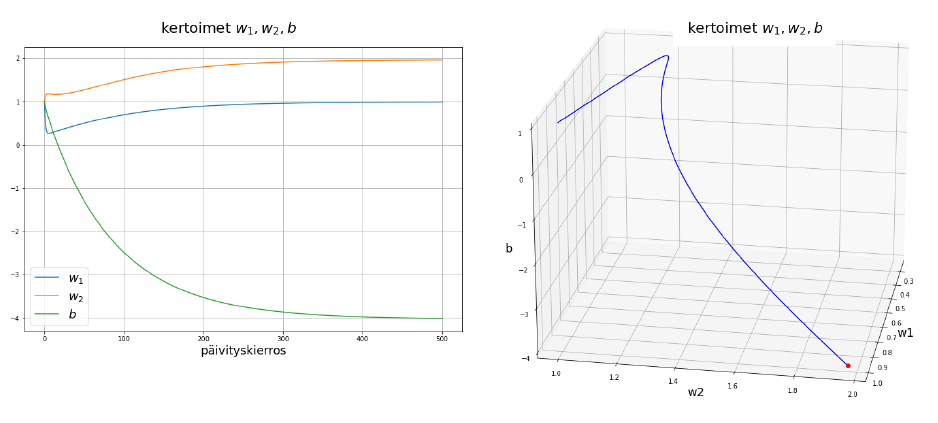

##**Exercise 4**

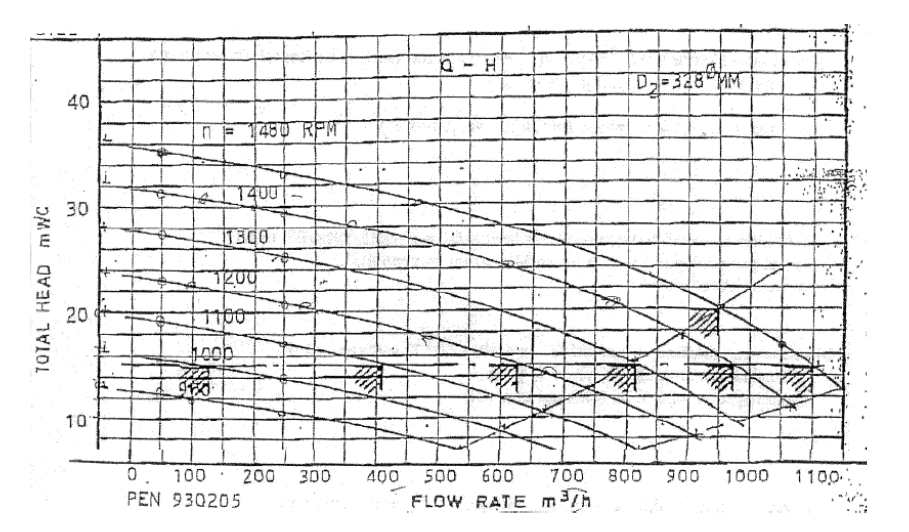

Load data_ex4.txt to Colab

In [287]:
#read data into a matrix data
data=np.loadtxt('data_ex4.txt',delimiter=',')
#rows [x1^(i),x2^(i),y^(i)] = [RPM/1000,FLOW RATE/1000,TOTAL HEAD] (taken from the picture above)
data[:5,:]

array([[ 1.48,  0.  , 36.1 ],
       [ 1.48,  0.05, 35.6 ],
       [ 1.48,  0.1 , 35.2 ],
       [ 1.48,  0.15, 34.6 ],
       [ 1.48,  0.2 , 34.4 ]])

Use the points $x_1^{(i)},x_2^{(i)},y^{(i)}$ to find a formula

$$
y=w_1x_1^2+w_2x_2^2+w_3x_1+w_4x_2+b
$$


using linear regression for the datapoints

$$
[(x_1^{(i)})^2,(x_2^{(i)})^2,x_1^{(i)},x_2^{(i)}],\quad y^{(i)}
$$

and draw pictures like below:

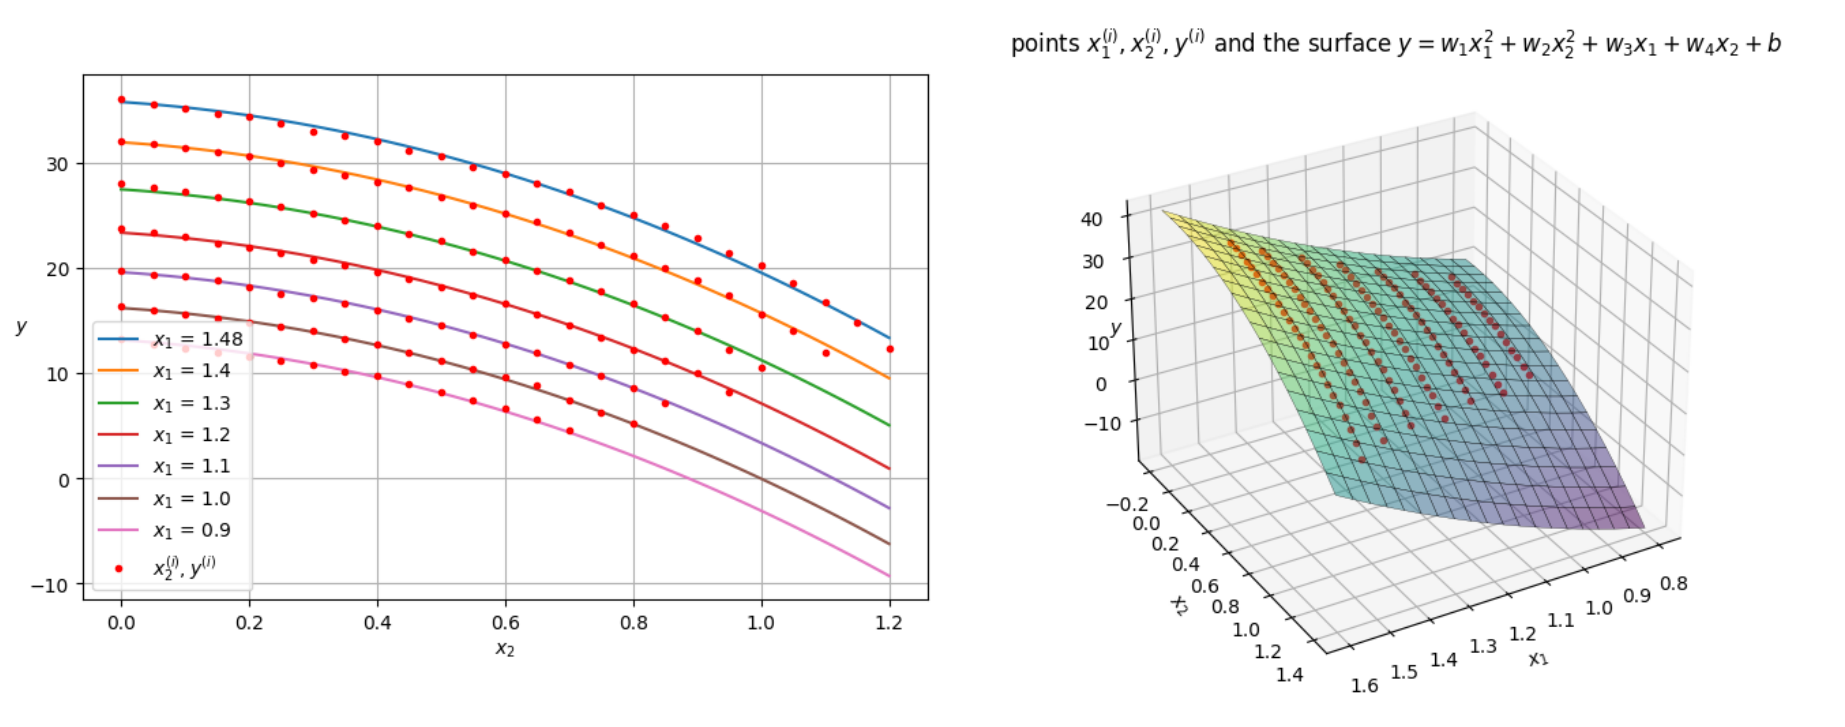

ans: $w_1=17.837,w_2=-12.299,w_3=-3.443,w_4=-3.924,b=1.803$

In [318]:
# Load data
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

X = np.column_stack((x1**2, x2**2, x1, x2, np.ones_like(x1)))

w = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"ans: w1={w[0]:.3f}, w2={w[1]:.3f}, w3={w[2]:.3f}, w4={w[3]:.3f}, b={w[3]:.3f}")

ans: w1=17.837, w2=-12.299, w3=-3.443, w4=-3.924, b=-3.924


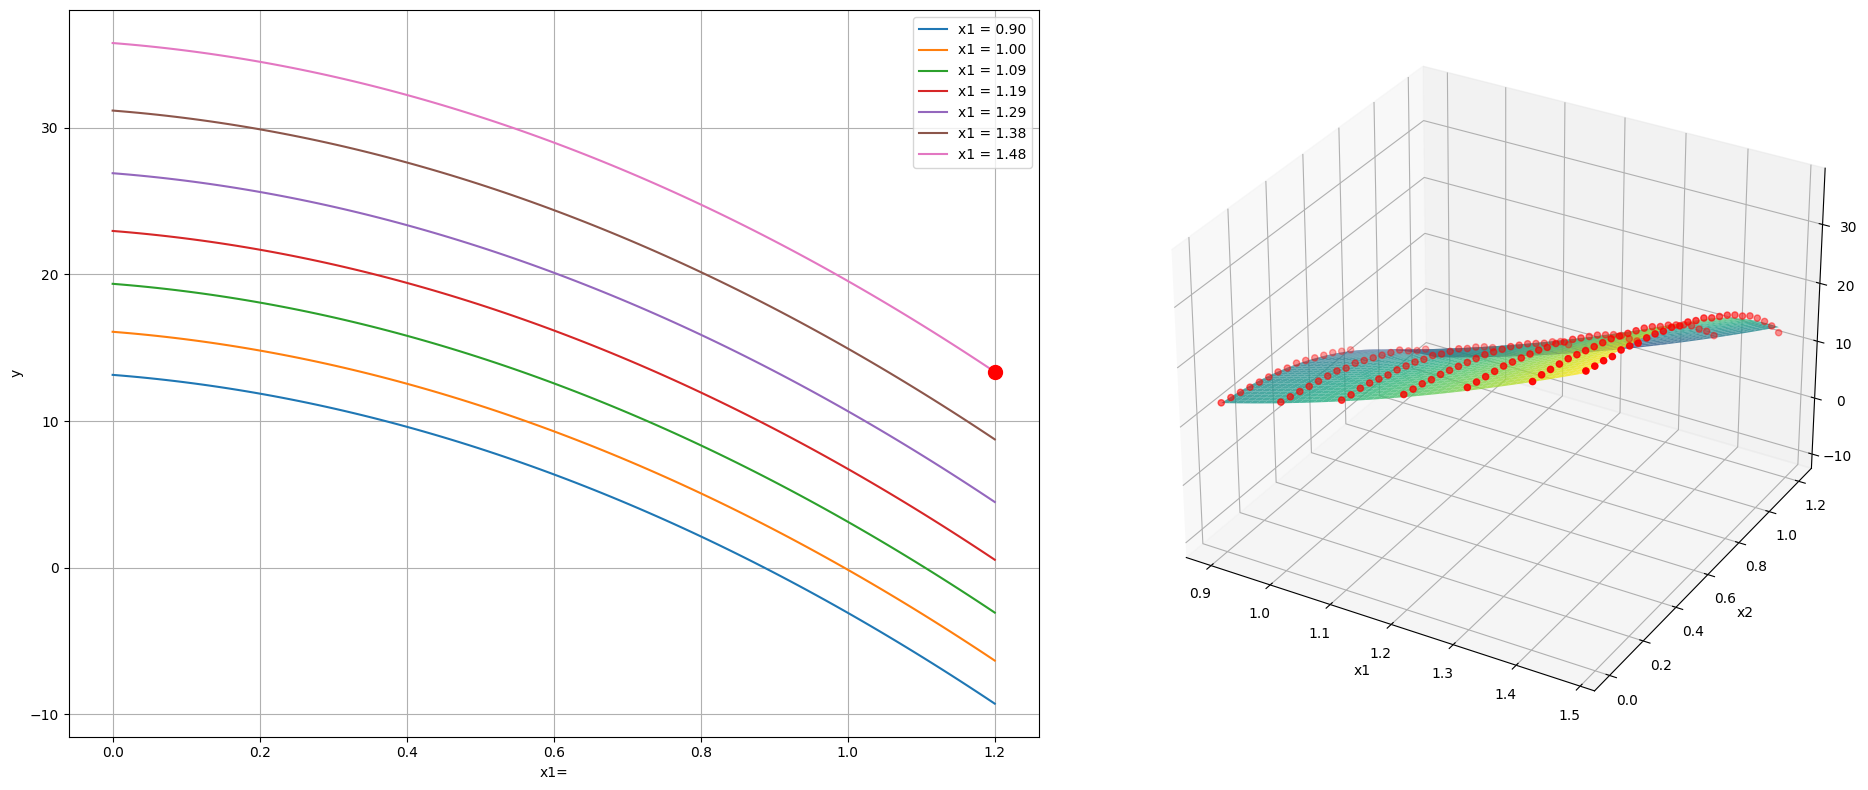

In [319]:
fig = plt.figure(figsize=(20, 8))

# 2D plot
ax1 = fig.add_subplot(121)
x2_plot = np.linspace(x2.min(), x2.max(), 100)
x1_values = np.linspace(x1.min(), x1.max(), 7)
for x1_val in x1_values:
    y_plot = w[0]*x1_val**2 + w[1]*x2_plot**2 + w[2]*x1_val + w[3]*x2_plot + w[4]
    ax1.plot(x2_plot, y_plot, label=f'x1 = {x1_val:.2f}')

last_x2 = x2_plot[-1]
last_y = w[0]*x1_values[-1]**2 + w[1]*last_x2**2 + w[2]*x1_values[-1] + w[3]*last_x2 + w[4]
ax1.plot(last_x2, last_y, 'ro', markersize=10)

ax1.set_xlabel('x1=')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

# 3D plot
ax2 = fig.add_subplot(122, projection='3d')
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = w[0]*X1**2 + w[1]*X2**2 + w[2]*X1 + w[3]*X2 + w[4]

surf = ax2.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.8)
ax2.scatter(x1, x2, y, color='red', s=20)

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')



plt.tight_layout()
plt.show()

## **Logistic Regression Exercise**


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

## **Exercise 1**

[Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) 569 datapoints, 30 variables, 2 classes



$$
x^{(i)}=[x^{(i)}_1,x_2^{(i)},...,x_{30}^{(i)}],\quad y^{(i)}=0,1
$$


$$
$$

Attribute Information:

    radius (mean of distances from center to points on the perimeter)

    texture (standard deviation of gray-scale values)

    perimeter

    area

    smoothness (local variation in radius lengths)

    compactness (perimeter^2 / area - 1.0)

    concavity (severity of concave portions of the contour)

    concave points (number of concave portions of the contour)

    symmetry

    fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.




    class:

            WDBC-Malignant

            WDBC-Benign



In [321]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_breast_cancer(return_X_y=True)
#rows of X are the coordinates x1...x30
#y contains the classes 0,1

Draw a picture like below of the distributions of the values of coordinates $x_1,..,x_{30}$

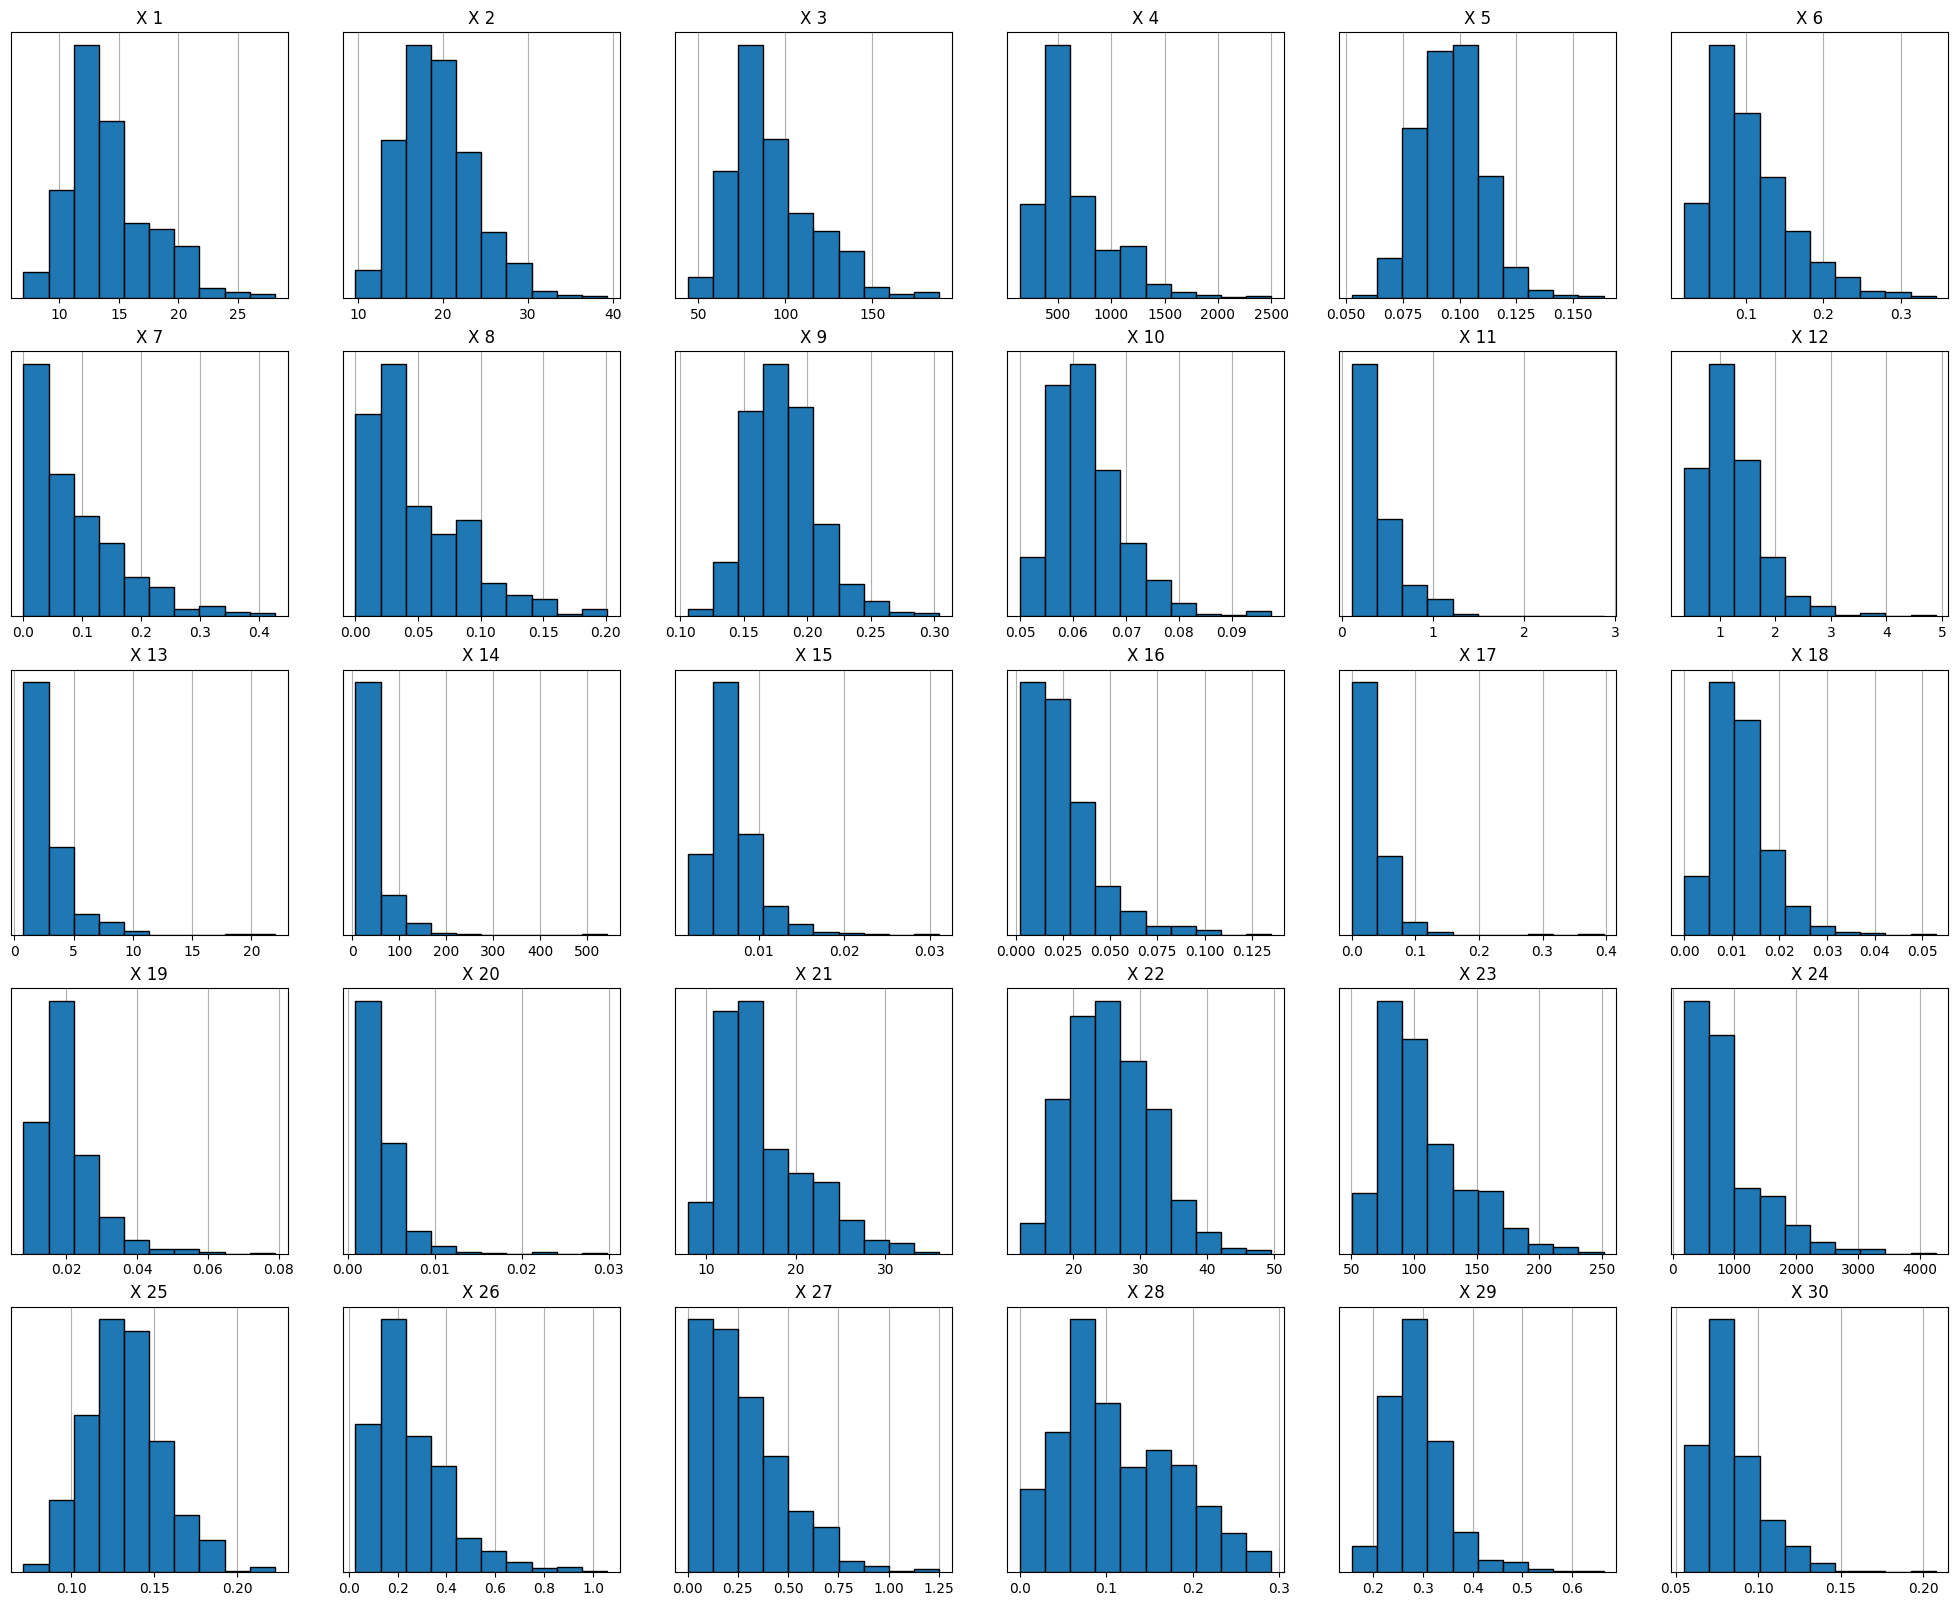

In [362]:
# Load the dataset
X, y = datasets.load_breast_cancer(return_X_y=True)

fig, axes = plt.subplots(5, 6, figsize=(25, 20))
axes = axes.ravel()

for i in range(30):
    _, bins, _ = axes[i].hist(X[:, i], bins=10, alpha=1,edgecolor='black',zorder=3)
    axes[i].set_title(f'X {i+1}')
    axes[i].set_yticks([])
    axes[i].grid(True, which='both', axis='both')

plt.show()

Find coefficients to a formula

$$
z=w_1\widehat{x}_1+w_2\widehat{x}_2+\dots+\widehat{x}_{30}+b
$$

for the classification of a point $x=[x_1,x_2,...,x_{30}]$ using the scaled coordinates (means $=0$ and standard deviations $=1$)
and draw a picture like below:

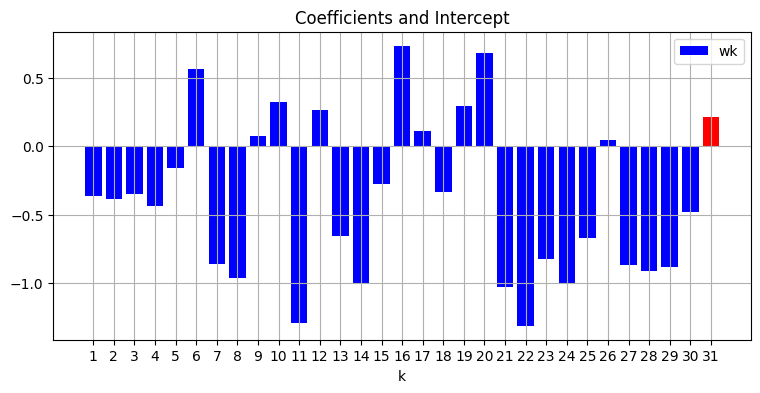

In [359]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=10000)
model.fit(X_scaled, y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

plt.figure(figsize=(9, 4))
k = np.arange(1, 32)
values = np.append(coefficients, intercept)
labels = [f'{i}' for i in range(1, 31)] + ['31']

plt.bar(k, values, tick_label=labels, color=['blue']*30 + ['red'])
plt.xlabel('k')
plt.title('Coefficients and Intercept')
plt.grid(True)
plt.legend(['wk', 'b'])
plt.show()

Create the confusion matrix

$$
$$

ans: $
 \left[\begin{array}{cc}
207&   5\\
2&355
\end{array}\right]
$


$$
$$


and classify the point

$x=[ 13.61    ,  24.98    ,  88.05    , 582.7     ,   0.09488 ,
         0.08511 ,   0.08625 ,   0.04489 ,   0.1609  ,   0.05871 ,
         0.4565  ,   1.29    ,   2.861   ,  43.14    ,   0.005872,
         0.01488 ,   0.02647 ,   0.009921,   0.01465 ,   0.002355,
        16.99    ,  35.27    , 108.6     , 906.5     ,   0.1265  ,
         0.1943  ,   0.3169  ,   0.1184  ,   0.2651  ,   0.07397 ]$


$$
$$

ans: $y=0$

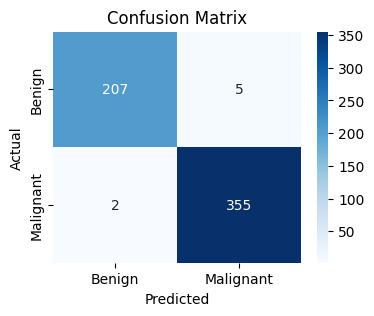

y = 0


In [360]:
y_pred = model.predict(X_scaled)
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#as given in the wquetion
new_data_point = np.array([13.61, 24.98, 88.05, 582.7, 0.09488, 0.08511, 0.08625, 0.04489, 0.1609, 0.05871,
                           0.4565, 1.29, 2.861, 43.14, 0.005872, 0.01488, 0.02647, 0.009921, 0.01465, 0.002355,
                           16.99, 35.27, 108.6, 906.5, 0.1265, 0.1943, 0.3169, 0.1184, 0.2651, 0.07397])

new_data_point_scaled = scaler.transform(new_data_point.reshape(1, -1))

new_data_class = model.predict(new_data_point_scaled)
print(f'y = {new_data_class[0]}')

##**Exercise 2**







[Wine recognition-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html), 178 datapoints, 13 variables, 3 classes

$$
x^{(i)}=[x_1^{(i)},x_2^{(i)},...,x_{13}^{(i)}],\quad y^{(i)}=0,1,2
$$

Wine data set of chemical properties of Italian
wines. The data set includes measurements of 13 different
properties for 178 wines, giving a data matrix of
dimension 178 x 13.

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

Each of these 178 wines comes from one of three grape
varieties: Barolo, Grignolino, or Barbera (0,1 tai 2).

In [363]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_wine(return_X_y=True)
#rows of X are the coordinates x1...x13
#y contains the classes 0,1,2

Draw a picture like below of the distribution of values of the coordinates $x_1-x_{13}$ within each class

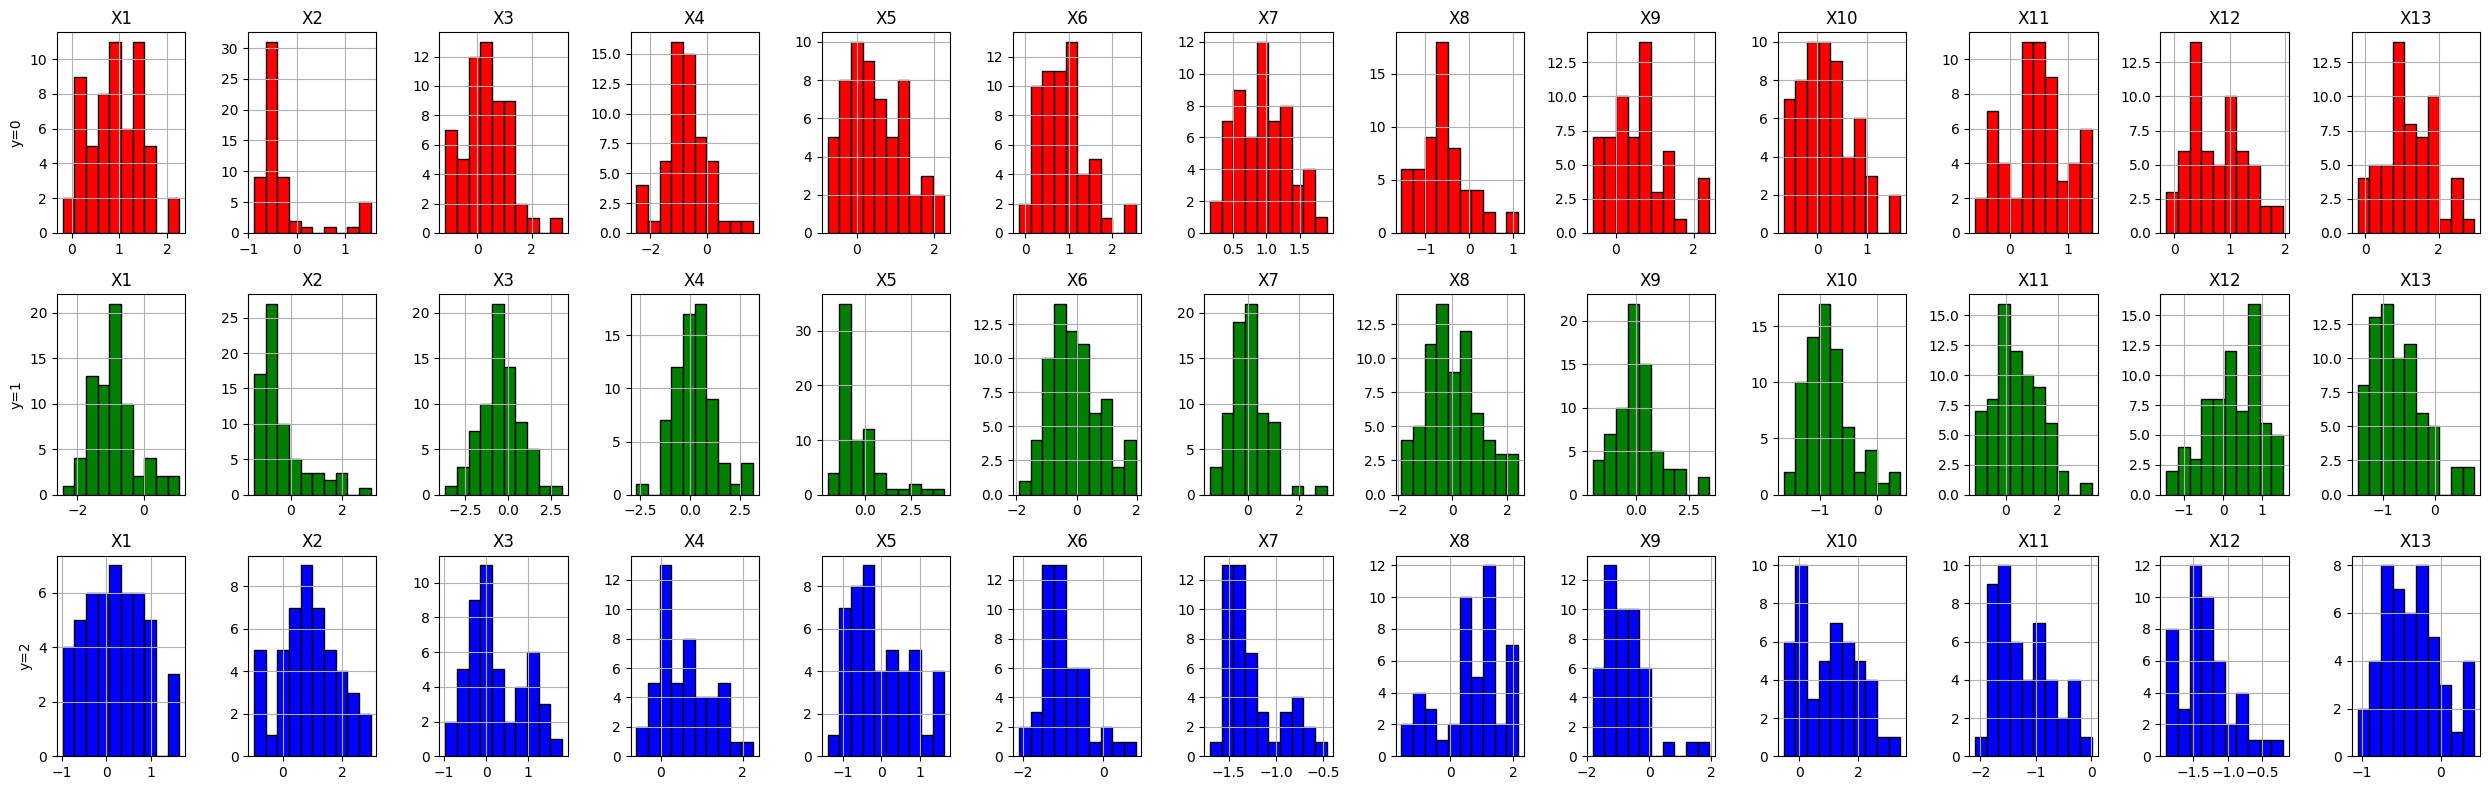

In [378]:
# Load the wine dataset
X, y = datasets.load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(3, 13, figsize=(25, 8))

colors = ['red', 'green', 'blue']
labels = ['y=0', 'y=1', 'y=2']

for i in range(13):  # Loop through each feature
    for j in range(3):  # Loop through each class
        axes[j, i].hist(X_scaled[y == j, i], bins=10, alpha=1, color=colors[j], edgecolor='black')
        axes[j, i].set_title(f'X{i+1}')
        if i == 0:
            axes[j, i].set_ylabel(labels[j])
        axes[j, i].grid(True)

plt.tight_layout()
plt.show()


Find coefficients to the formula

$$
[z_1,z_2,z_3]=[\widehat{x}_1,\widehat{x}_2,...,\widehat{x}_{13}]@\left[
\begin{array}{ccc}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
\vdots&\vdots&\vdots\\
w_{13,1}&w_{13,2}&w_{13,3}
\end{array}
\right]+[b_1,b_2,b_3]
$$

to classify a wine $ x=[x_1,x_2,\dots,x_{13}]$ using the scaled coordinates  (means $= 0$ and standard deviations $= 1$), and draw a picture like below.



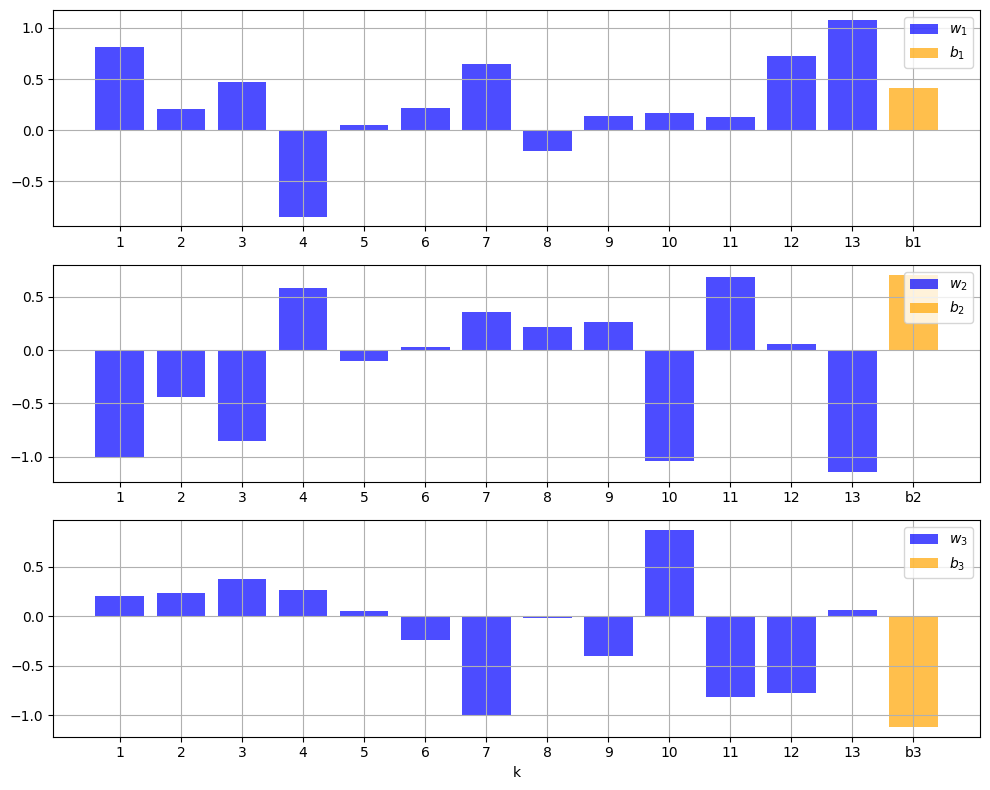

In [383]:
# Load the wine dataset
X, y = datasets.load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
log_reg.fit(X_scaled, y)

coefficients = log_reg.coef_
intercepts = log_reg.intercept_

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for i in range(3):
    axes[i].bar(np.arange(1, 14), coefficients[i], color='blue', alpha=0.7, label=f'$w_{i+1}$')
    axes[i].bar(14, intercepts[i], color='orange', alpha=0.7, label=f'$b_{i+1}$')
    axes[i].set_xticks(np.arange(1, 15))
    axes[i].set_xticklabels([f'{j}' for j in range(1, 14)] + [f'b{i+1}'])
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('k')

plt.tight_layout()
plt.show()


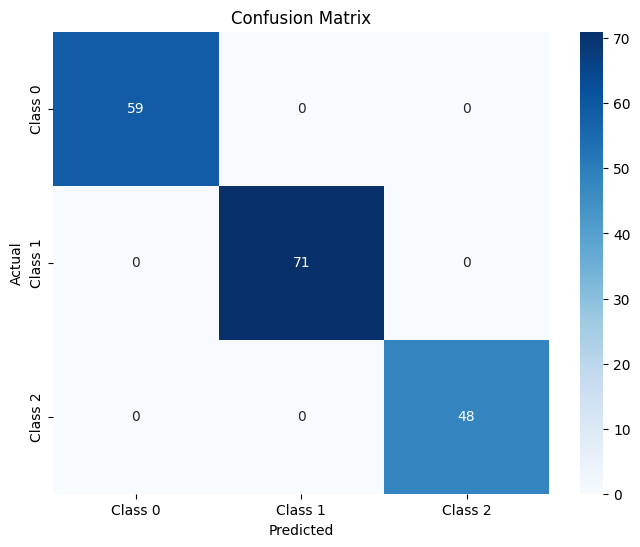

In [379]:
model = LogisticRegression(max_iter=10000, multi_class='ovr')
model.fit(X_scaled, y)

# Create a confusion matrix
y_pred = model.predict(X_scaled)
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Create the  confusion matrix

ans: $\left[\begin{array}{ccc}
59&0&0\\0&71&0\\0&0&48
\end{array}\right]$

In [380]:
new_wine_sample = np.array([13.0, 2.34, 2.36, 19.5, 99.7, 2.29, 2.03, 0.36, 1.59, 5.1, 0.96, 2.61, 746])

new_wine_sample_scaled = scaler.transform(new_wine_sample.reshape(1, -1))

# Predict the class of the new wine sample
new_wine_class = model.predict(new_wine_sample_scaled)
print(f'So, ans: y= {new_wine_class[0]}')

So, ans: y= 1


and classify the wine

$x=[13.0,2.34,2.36,19.5,99.7,2.29,2.03,0.36,1.59,5.1,0.96,2.61,746]$

(ans: $y=1$)

## **Exercise 3**










Use the points $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,$ given below to find coefficients $w_1,w_2,w_3,w_4,w_5$ and $b$ such that a point $x=[x_1,x_2]$ belongs to

class $y=1$, if
$z=w_1x_1^2+w_2x_1x_2+w_3x_2^2+w_4x_1+w_5x_2+b> 0$

class $y=0$, if $z<0$


using logistic regression for the datapoints

 $$[(x^{(i)}_1)^2,x^{(i)}_1x^{(i)}_2,(x^{(i)}_2)^2,x^{(i)}_1,x^{(i)}_2 ],\quad y^{(i)}$$

and draw a picture like below of the corresponding classification of 2D-points

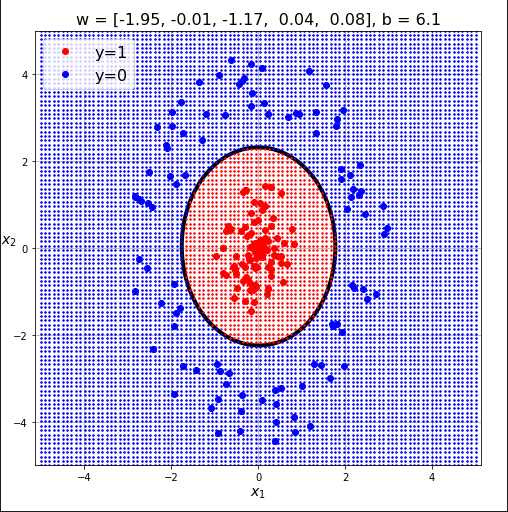

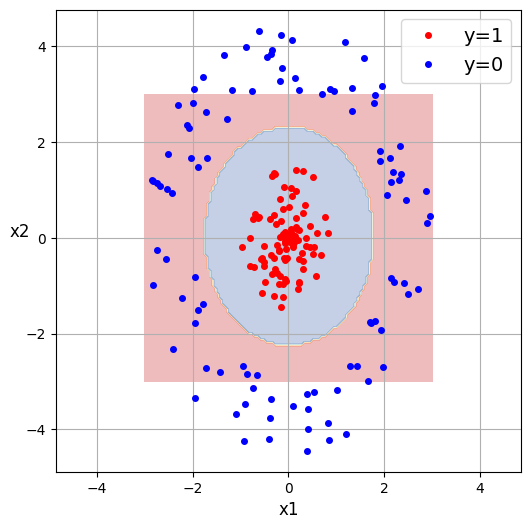

w1: 0.0435
w2: 0.0825
w3: -1.9474
w4: -0.0107
w5: -1.1698
b: 6.0712


In [72]:
# Generate data points
np.random.seed(0)

r1 = np.random.rand(100)
th1 = 2*np.pi*np.random.rand(100)
x1_class1 = r1*np.cos(th1)
x2_class1 = 1.5*r1*np.sin(th1)

r2 = 2+np.random.rand(100)
th2 = 2*np.pi*np.random.rand(100)
x1_class0 = r2*np.cos(th2)
x2_class0 = 1.5*r2*np.sin(th2)

X = np.vstack((np.column_stack((x1_class1, x2_class1)),
               np.column_stack((x1_class0, x2_class0))))
y = np.hstack((np.ones(100), np.zeros(100)))

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LogisticRegression()
model.fit(X_poly, y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid_poly = poly.transform(X_grid)
Z = model.predict(X_grid_poly).reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.plot(x1_class1, x2_class1, 'r.', markersize=8, label='y=1')
plt.plot(x1_class0, x2_class0, 'b.', markersize=8, label='y=0')
plt.grid(True)
plt.axis('equal')
plt.legend(fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', rotation=0, fontsize=12)
plt.show()

coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"w1: {coef[1]:.4f}")
print(f"w2: {coef[2]:.4f}")
print(f"w3: {coef[3]:.4f}")
print(f"w4: {coef[4]:.4f}")
print(f"w5: {coef[5]:.4f}")
print(f"b: {intercept:.4f}")

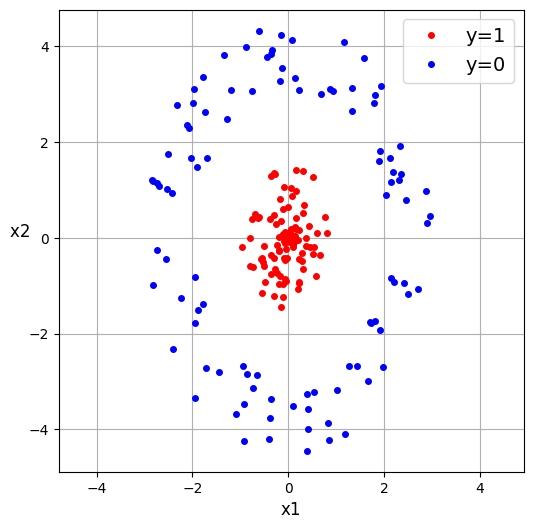

In [384]:
np.random.seed(0)

r1=np.random.rand(100)
th1=2*np.pi*np.random.rand(100)
x1pun=r1*np.cos(th1)
x2pun=1.5*r1*np.sin(th1)

r2=2+np.random.rand(100)
th2=2*np.pi*np.random.rand(100)
x1sin=r2*np.cos(th2)
x2sin=1.5*r2*np.sin(th2)


plt.figure(figsize=(6,6))
plt.plot(x1pun,x2pun,'r.',markersize=8,label='y=1')
plt.plot(x1sin,x2sin,'b.',markersize=8,label='y=0')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=14)
plt.xlabel('x1',fontsize=12)
plt.ylabel('x2 ',rotation=0,fontsize=12)
plt.show()

## **CNN (Convolutional Neural Network)**

## **EXERCISE 1**

[Kaggles sign-language-mnist-dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

bw 28x28-pixel images of hand-gesture alphabets A-Y (without  J),
27455 training- and 7172 test-images.

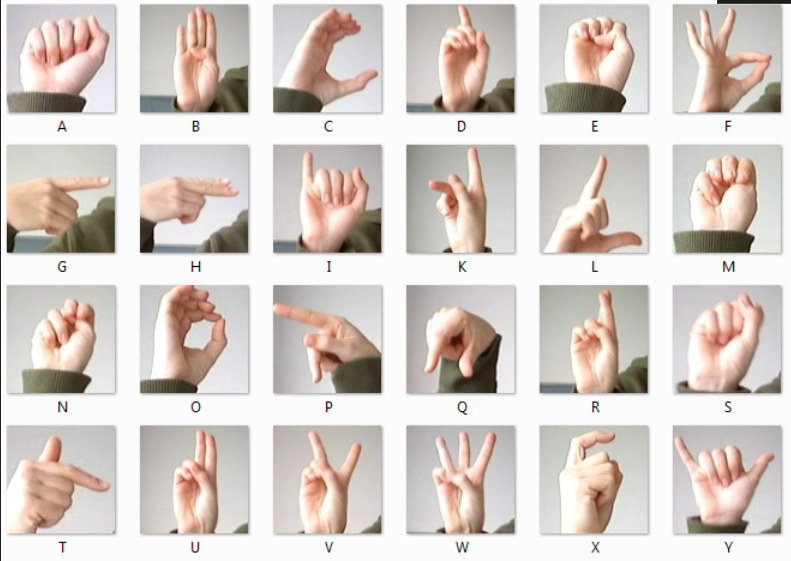

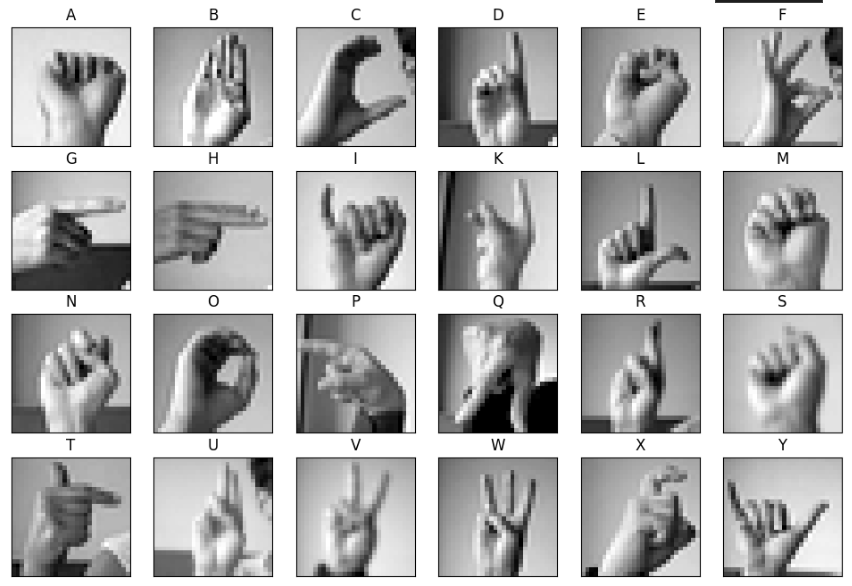

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
np.random.seed(0)

In [76]:
train_data = np.loadtxt('sign_mnist_train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('sign_mnist_test.csv', delimiter=',', skiprows=1)

X_train = train_data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
y_train = train_data[:, 0]
X_test = test_data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
y_test = test_data[:, 0]

# Adjust labels (remove class 9 and shift 10-24 down by 1)
y_train[y_train > 9] -= 1
y_test[y_test > 9] -= 1

# Convert to categorical
y_train = to_categorical(y_train, 24)
y_test = to_categorical(y_test, 24)

In [77]:
# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)





Build and train a CNN (for example like the one below) that achieves 99.5 % test accuracy  

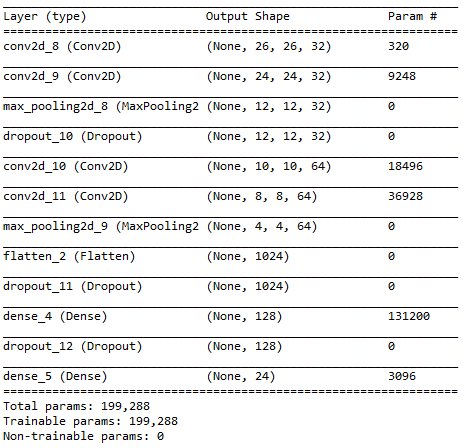

In [78]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 93s 106ms/step - accuracy: 0.2140 - loss: 2.5335 - val_accuracy: 0.7819 - val_loss: 0.5793
Epoch 2/20
  1/857 ━━━━━━━━━━━━━━━━━━━━ 1:04 76ms/step - accuracy: 0.5938 - loss: 1.1211

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5938 - loss: 1.1211 - val_accuracy: 0.7867 - val_loss: 0.5776
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.7557 - loss: 0.6969 - val_accuracy: 0.9279 - val_loss: 0.2228
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7500 - loss: 0.5255 - val_accuracy: 0.9142 - val_loss: 0.2387
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.8744 - loss: 0.3581 - val_accuracy: 0.9345 - val_loss: 0.1665
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8438 - loss: 0.3194 - val_accuracy: 0.9396 - val_loss: 0.1576
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 134s 105ms/step - accuracy: 0.9256 - loss: 0.2141 - val_accuracy: 0.9668 - val_loss: 0.0994
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9062 - loss: 0.2203 - val_accuracy: 0.9716 - val_loss: 0.0919
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 138s 105ms/step - accuracy: 0.9475 - loss: 0.1595 - val_accuracy

**So, the model accurcy is 99.8%**

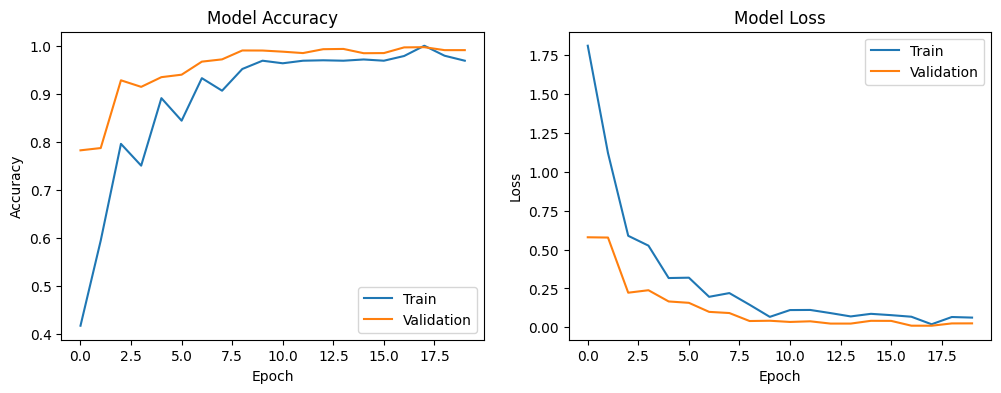

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


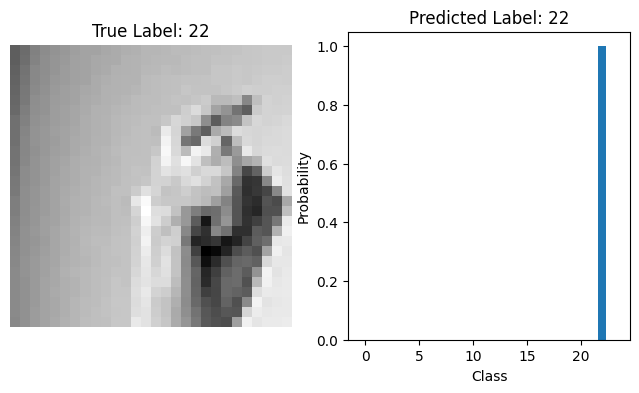

True Label: 22
Predicted Label: 22
Confidence: 1.0000


In [79]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# i will here try to make predictions on a random test image
import random

idx = random.randint(0, len(X_test) - 1)
img = X_test[idx]
true_label = np.argmax(y_test[idx])

prediction = model.predict(img.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')

plt.subplot(122)
plt.bar(range(24), prediction[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {prediction[0][predicted_label]:.4f}")

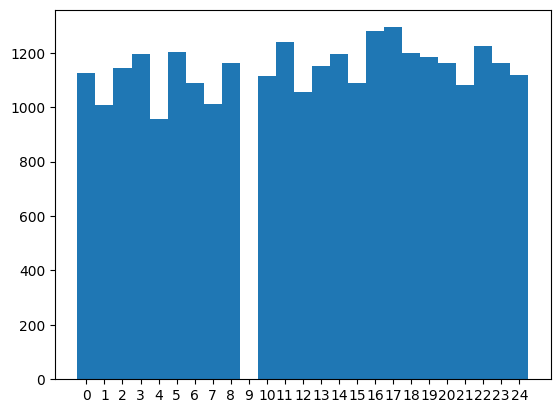

In [ ]:
#example images
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k,:]
    mk=xtraink.shape[0]
    indk=np.random.randint(mk)
    kuvak=xtraink[indk,:].reshape((28,28))
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

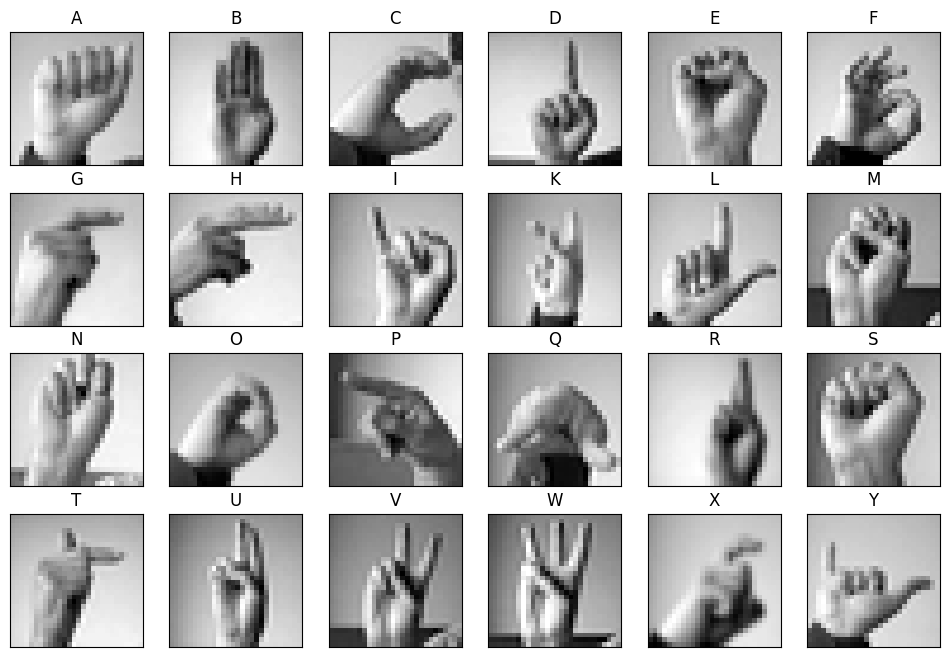

## **Neural Network**

## **EXERCISE 1**

Build and train a neural network that achieves 99.5 % classification accuracy for datapoints $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,2,3$, below.

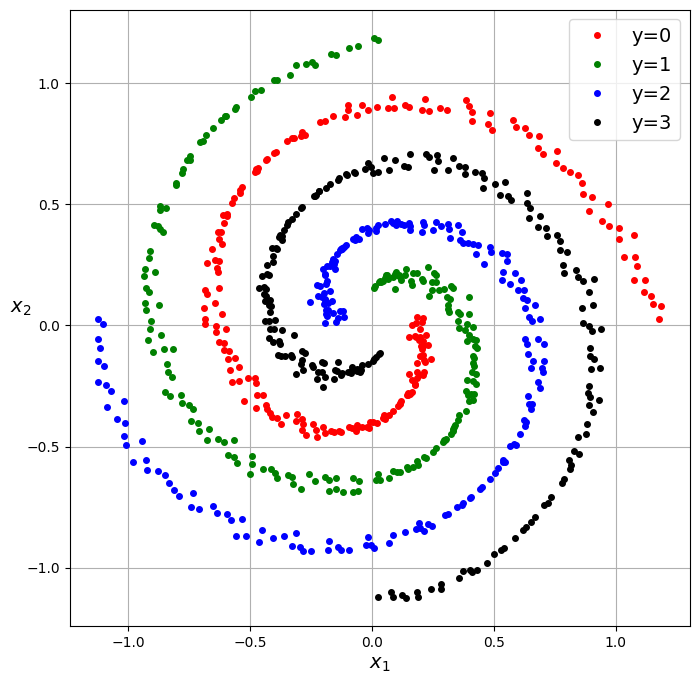

In [26]:
np.random.seed(0)
n=200
m=4*n #number of datapoints
th=np.linspace(0,2*np.pi,n)
r=0.15+np.linspace(0,1,n)
e=0.02*np.random.randn(n)

x11=r*np.cos(-th)+e
x12=r*np.sin(-th)+e

x21=r*np.cos(np.pi/2-th)+e
x22=r*np.sin(np.pi/2-th)+e

x31=r*np.cos(np.pi-th)+e
x32=r*np.sin(np.pi-th)+e

x41=r*np.cos(3*np.pi/2-th)+e
x42=r*np.sin(3*np.pi/2-th)+e


plt.figure(figsize=(8,8))
plt.plot(x11,x12,'r.',markersize=8,label='y=0')
plt.plot(x21,x22,'g.',markersize=8,label='y=1')
plt.plot(x31,x32,'b.',markersize=8,label='y=2')
plt.plot(x41,x42,'k.',markersize=8,label='y=3')
plt.grid()
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.legend(fontsize=14)
plt.show()

In [27]:
# Generate data
np.random.seed(0)
n = 200
m = 4*n  # number of datapoints
th = np.linspace(0, 2*np.pi, n)
r = 0.15 + np.linspace(0, 1, n)
e = 0.02 * np.random.randn(n)

x11 = r*np.cos(-th) + e
x12 = r*np.sin(-th) + e
x21 = r*np.cos(np.pi/2-th) + e
x22 = r*np.sin(np.pi/2-th) + e
x31 = r*np.cos(np.pi-th) + e
x32 = r*np.sin(np.pi-th) + e
x41 = r*np.cos(3*np.pi/2-th) + e
x42 = r*np.sin(3*np.pi/2-th) + e

X = np.vstack((np.column_stack((x11, x12)),
               np.column_stack((x21, x22)),
               np.column_stack((x31, x32)),
               np.column_stack((x41, x42))))

y = np.concatenate((np.zeros(n), np.ones(n), 2*np.ones(n), 3*np.ones(n)))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# calculating  the model accuracy
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"So, the model test accuracy is : {test_accuracy:.4f}")

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

So, the model test accuracy is : 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Calculate the confusion matrix

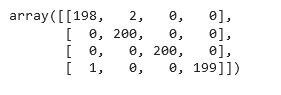

Text(0, 0.5, 'True Label')

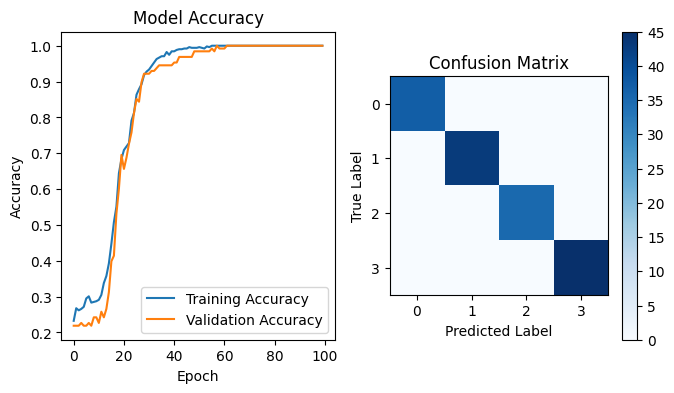

In [42]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#  confusion matrix
plt.subplot(132)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0', '1', '2', '3'])
plt.yticks(tick_marks, ['0', '1', '2', '3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

and draw a picture like below of the resulting classification

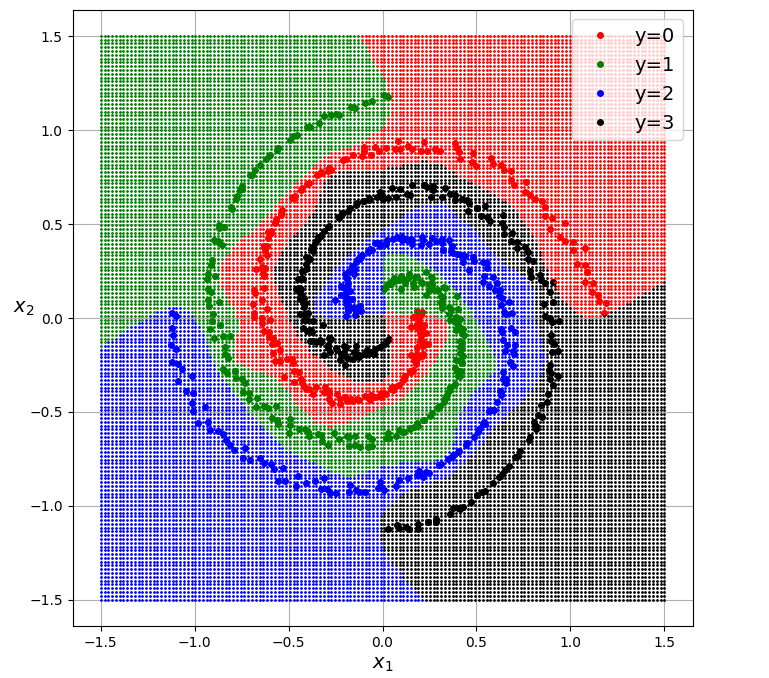

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step


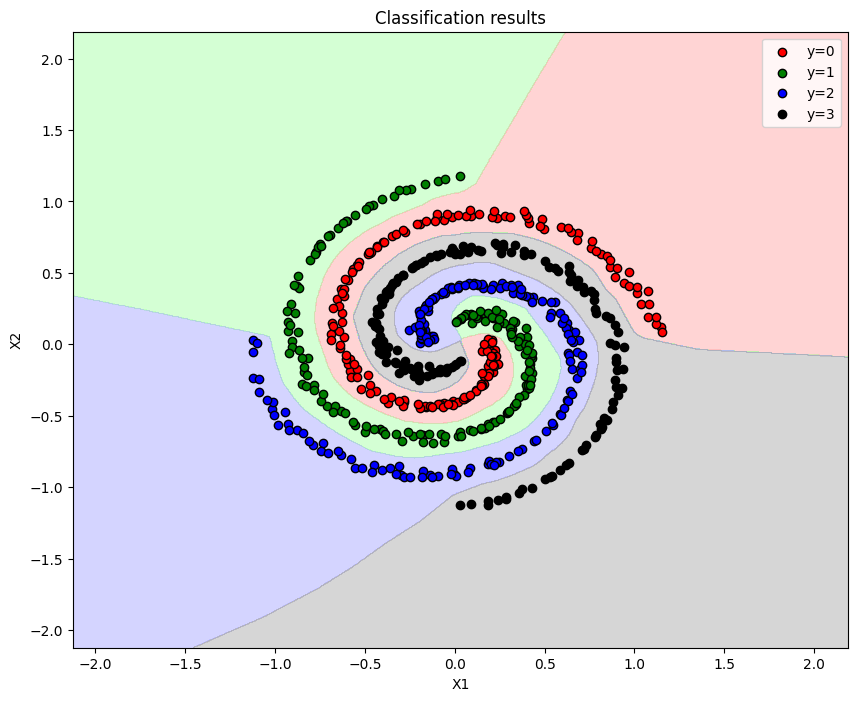

In [45]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
cmap_points = ['red', 'green', 'blue', 'black']

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_background)

for idx, color in enumerate(cmap_points):
    plt.scatter(X_train[y_train == idx, 0], X_train[y_train == idx, 1], c=color, label=f'y={idx}', edgecolors='k')

plt.title('Classification results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


## **EXERCISE 2**

In [24]:
#load apple_quality.csv to colab
df=pd.read_csv('apple_quality.csv',index_col=0)
df.head() #first 5 rows

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
A_id                                                                    
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

       Acidity Quality  
A_id                    
0    -0.491590    good  
1    -0.722809    good  
2     2.621636     bad  
3     0.790723    good  
4     0.501984    good

Goal: to predict Quality using the other 7 variables Size ... Acidity

Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

[561  38]

 [ 39 562]

Classify the apple
xt=[ 1.34470668, -0.08934453, -4.50875321,  0.59093255, -3.98352604,
        1.50052136, -0.28032534]

(ans. bad)        

In [25]:
if 'A_id' in df.columns:
    df = df.drop('A_id', axis=1)

X = df.drop('Quality', axis=1).values
y = df['Quality'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# printing the  accuracy of my model
accuracy = accuracy_score(y_test, y_pred)
print(f'So, model Accuracy is : {accuracy * 100:.2f}%')

xt = [[1.34470668, -0.08934453, -4.50875321, 0.59093255, -3.98352604, 1.50052136, -0.28032534]]
sample_scaled = scaler.transform(xt)
prediction = model.predict(sample_scaled)
predicted_quality = label_encoder.inverse_transform((prediction > 0.5).astype("int32"))
print(f'ans: {predicted_quality[0]}')


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7081 - loss: 0.5551 - val_accuracy: 0.8342 - val_loss: 0.3734
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8502 - loss: 0.3432 - val_accuracy: 0.8567 - val_loss: 0.3152
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8739 - loss: 0.2954 - val_accuracy: 0.8658 - val_loss: 0.2956
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.2728 - val_accuracy: 0.8792 - val_loss: 0.2736
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9027 - loss: 0.2553 - val_accuracy: 0.8833 - val_loss: 0.2693
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8976 - loss: 0.2525 - val_accuracy: 0.8883 - val_loss: 0.2667
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9134 - loss: 0.2242 - val_accuracy: 0.8983 - val_loss: 0.2504
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.2285 - val_accuracy: 0.892

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **EXERCISE 3**

In [51]:
#load Dry_Bean_Dataset.csv to colab
df=pd.read_csv('Dry_Bean_Dataset.csv')
df.shape

(13611, 17)

In [52]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Goal: to predict the class using the other variables.


Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

In [54]:
print(df.head())

X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [55]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax for multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7138 - loss: 0.9511 - val_accuracy: 0.9119 - val_loss: 0.2694
Epoch 2/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9117 - loss: 0.2596 - val_accuracy: 0.9192 - val_loss: 0.2249
Epoch 3/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.2264 - val_accuracy: 0.9244 - val_loss: 0.2325
Epoch 4/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.2043 - val_accuracy: 0.9276 - val_loss: 0.2034
Epoch 5/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.1871 - val_accuracy: 0.9297 - val_loss: 0.2035
Epoch 6/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.1977 - val_accuracy: 0.9318 - val_loss: 0.2037
Epoch 7/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.1896 - val_accuracy: 0.9297 - val_loss: 0.2028
Epoch 8/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9280 - loss: 0.1919 - val_accuracy: 0.9370 - val_

In [56]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

xt = np.array([[29817, 654.94, 249.939378, 153.5127658, 1.62813417, 0.78915041, 30306, 194.8439979, 0.76110374, 0.98386458, 0.87351583, 0.77956502, 0.00838245, 0.00190968, 0.60772162, 0.98945234]])
xt_scaled = scaler.transform(xt)
prediction = model.predict(xt_scaled)
predicted_class = np.argmax(prediction, axis=-1)
class_names = df['Class'].unique()

print(f'ans: {class_names[predicted_class][0]}')


Confusion Matrix:
[[ 593    4    0    0    0    7   15]
 [   3  364    0   22    1    4    1]
 [   0    0  161    0    0    0    0]
 [   3   12    0  451   10    3    0]
 [   0    0    0    3  564   13    8]
 [  20    1    0    0   11  656  111]
 [  17    0    0    0    0   23 1003]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
ans: DERMASON


Classify the dry bean

xt=[29817        ,   654.94      ,   249.9393798 ,   153.5127658 ,
           1.62813417,     0.78915041, 30306        ,   194.8439979 ,
           0.76110374,     0.98386458,     0.87351583,     0.77956502,
           0.00838245,     0.00190968,     0.60772162,     0.98945234]

(ans. dermason)           

## **EXERCISE 6**

In [58]:
#load ex6_data.csv to colab
df=pd.read_csv('ex6_data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
#remove column Market Category (contains only 8172 values)
df.drop(columns='Market Category',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [7]:
#remove rows with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


Use Models that have at least 10 representatives and datapoints whose MSRP  $\le$ 100000.

Split datapoints to training and test (70%/30%),
and build and train a neural network to predict the value  $y$ = MSRP using the other variables such that test mae is $\le$ 2750.

Draw pictures like below

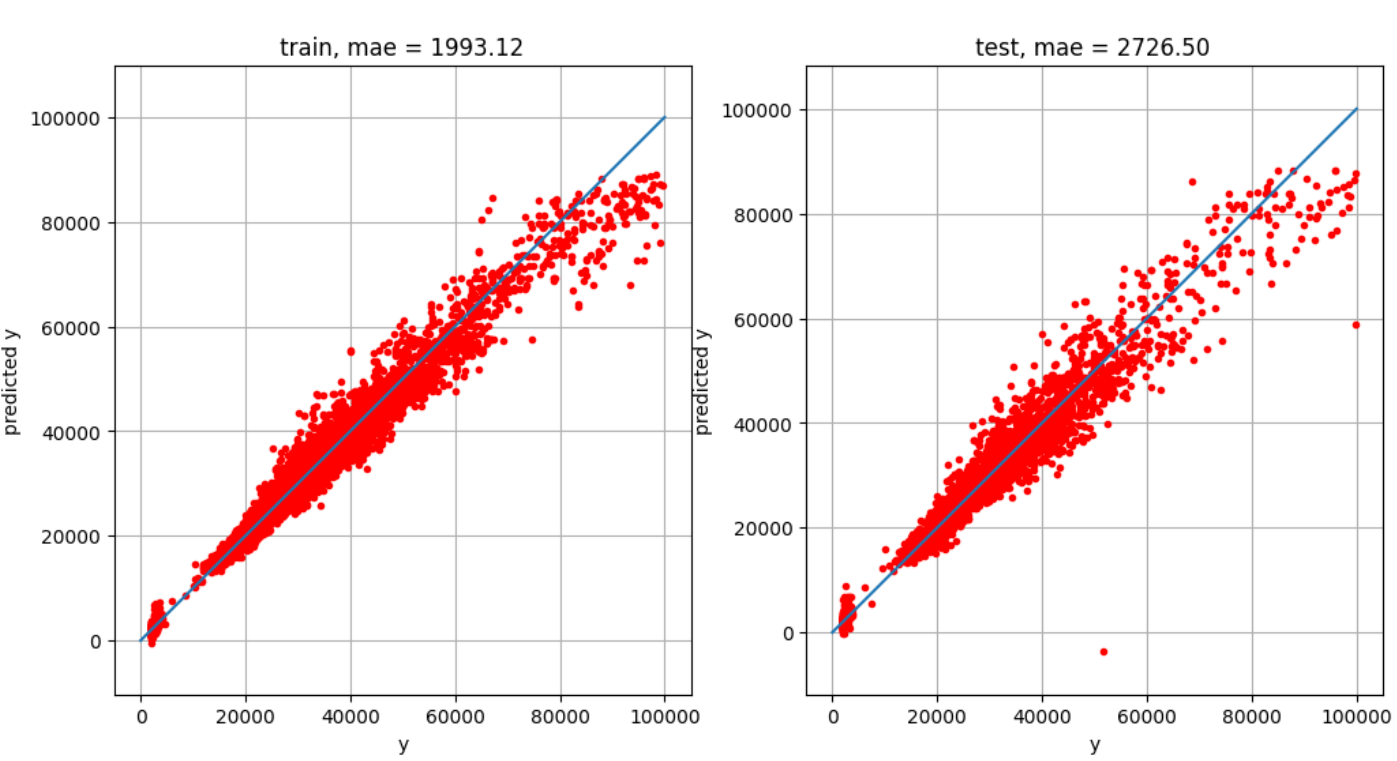

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


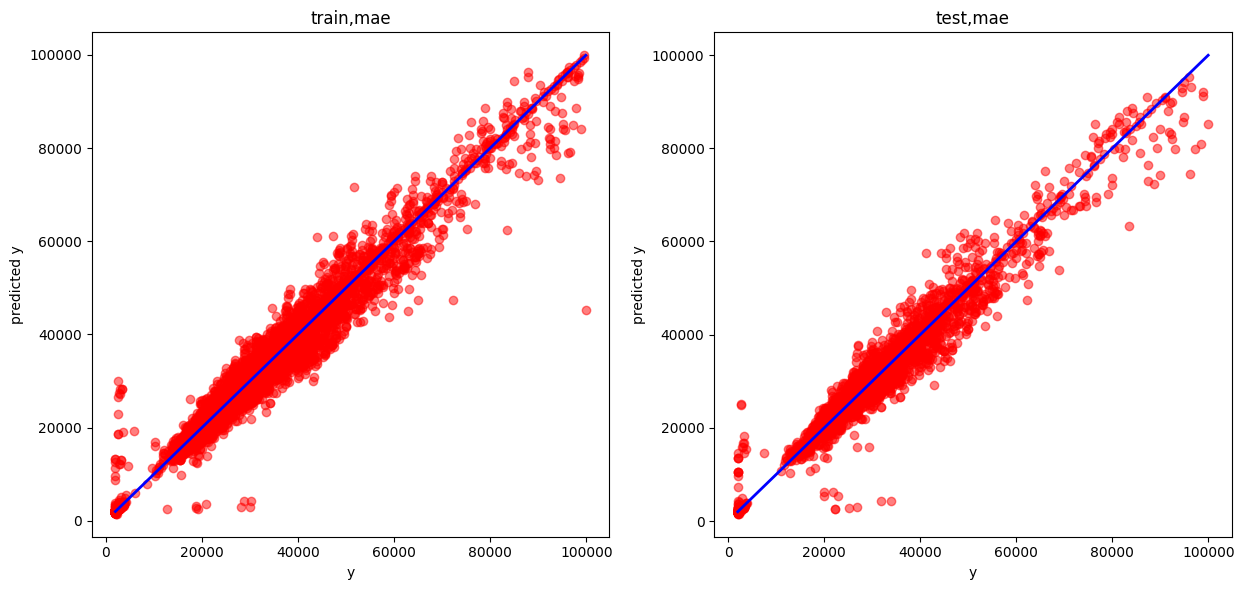

Train MAE: 2040.70
Test MAE: 2463.12


In [65]:
model_counts = data['Model'].value_counts()
valid_models = model_counts[model_counts >= 10].index
filtered_data = data[data['Model'].isin(valid_models) & (data['MSRP'] <= 100000)]

X = filtered_data.drop(['MSRP'], axis=1)
y = filtered_data['MSRP']


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ]))
])

model.named_steps['regressor'].compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.named_steps['regressor'].fit(
    preprocessor.fit_transform(X_train), y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot training
plt.figure(figsize=(18, 6))


plt.subplot(132)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b-', lw=2)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.title('train,mae')


plt.subplot(133)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-', lw=2)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.title('test,mae')

plt.tight_layout()
plt.show()

# Printing the  MAE for both train and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")